the goal here is to generate a file with data = fake LSS for LSST (due to MW dust, observing strategy, and other observational artifacts) and mask = depth and extinction limited footprint, with coverage in all six bands.

the output file `fakelss_baseline-v1.4_nside1024.npz` is saved in `/global/homes/a/awan/so/cmblxlss/data/` on NERSC; anyone with `sobs` affiliation should be able to read the file.

In [1]:
import os
import numpy as np
import numpy.ma as ma

In [2]:
# load in the code
import sys
sys.path.append('../code/')
from settings import *

In [3]:
# read in the metricBundle file with all the data
fakelss = np.load('../data/dNbyN_metricBundle_baseline-v1.4.npz')

fakelss.files

['header',
 'metricValues',
 'mask',
 'fill',
 'slicer_init',
 'slicerName',
 'slicePoints',
 'slicerNSlice',
 'slicerShape']

In [4]:
# set up the masked array with all the relevant data
fakelss_map = fakelss['metricValues'].view(ma.MaskedArray)
fakelss_map.mask = fakelss['mask']
fakelss_map.fill_value = fakelss['fill']
fakelss_map

masked_array(data=[--, --, --, ..., --, --, --],
             mask=[ True,  True,  True, ...,  True,  True,  True],
       fill_value=-1.6375e+30)

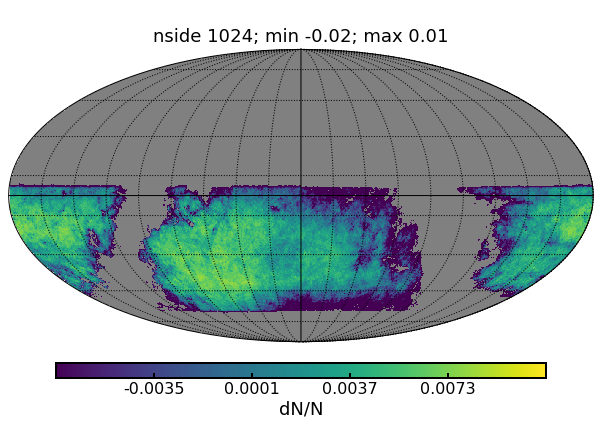

In [5]:
# plot to be sure
from utils_plot import plot_skymap

plot_skymap(map_in=fakelss_map, title='', file_tag=None,
                    data_label='dN/N', outdir=None,
                    save_plot=False, show_plot=True)

In [6]:
# save the file
fname = 'fakelss_baseline-v1.4_nside1024.npz'
np.savez_compressed('../data/%s' % (fname),
                    data=fakelss_map.data,
                    mask=fakelss_map.mask,
                    fill_value=fakelss_map.fill_value)

In [7]:
# read in the saved data
saved_data = np.load('../data/%s' % (fname))
saved_data.files

['data', 'mask', 'fill_value']